In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta  # Technical analysis library

In [7]:
tickers = tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "BRK-B", "JPM", "V",
    "UNH", "MA", "XOM", "AVGO", "JNJ", "WMT", "PG", "LLY", "COST", "HD",
    "MRK", "ABBV", "ORCL", "BAC", "PEP", "MCD", "KO", "TMO", "DIS", "CSCO",
    "CVX", "ADBE", "ACN", "WFC", "DHR", "LIN", "VZ", "NFLX", "ABT", "CRM",
    "NKE", "T", "INTC", "TXN", "QCOM", "MDT", "IBM", "HON", "AMGN", "SBUX",
    "CAT", "LMT", "LOW", "UPS", "GS", "MS", "BLK", "RTX", "SPGI", "GILD",
    "MDLZ", "AMT", "C", "DE", "BKNG", "ADP", "CB", "SCHW", "PLD", "GE",
    "PYPL", "CME", "ZTS", "ISRG", "MO", "SO", "CL", "ELV", "TGT", "MMC",
    "CI", "DUK", "PGR", "SYK", "USB", "REGN", "AON", "AXP", "HCA",
    "CCI", "EQIX", "EOG", "NSC", "GM", "F", "MAR", "EXC", "D", "PSA", "O", "ECL"
]

In [8]:
data = yf.download(tickers, period='1y', interval='1d')

C:\Users\seana\AppData\Local\Temp\ipykernel_13420\2094598212.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='1y', interval='1d')
[*********************100%***********************]  101 of 101 completed


In [9]:
# Calculate indicators for each ticker
print("Calculating indicators...")
for ticker in tickers:
    try:
        # Get close prices for this ticker
        close_prices = data[('Close', ticker)]
        
        # Skip if no data available
        if close_prices.isna().all():
            print(f"No data for {ticker}, skipping...")
            continue
            
        # Calculate RSI (14-day)
        data[('RSI', ticker)] = ta.momentum.RSIIndicator(
            close=close_prices, window=14
        ).rsi()
        
        # Calculate MACD
        macd = ta.trend.MACD(close=close_prices)
        data[('MACD', ticker)] = macd.macd()
        data[('MACD_Signal', ticker)] = macd.macd_signal()
        data[('MACD_Hist', ticker)] = macd.macd_diff()
        
        # Calculate SMA50
        data[('SMA50', ticker)] = close_prices.rolling(window=50).mean()
        
        print(f"✓ Calculated indicators for {ticker}")
        
    except Exception as e:
        print(f"✗ Error calculating indicators for {ticker}: {e}")

print("\nIndicators calculated for all tickers!")

# Show a sample of the results
print("\nSample data (first 5 rows, RSI columns only):")
print(data['RSI'].head())

print(f"\nDataFrame shape: {data.shape}")
print(f"Column levels: {data.columns.nlevels}")

Calculating indicators...
✓ Calculated indicators for AAPL
✓ Calculated indicators for MSFT
✓ Calculated indicators for GOOGL
✓ Calculated indicators for AMZN
✓ Calculated indicators for NVDA
✓ Calculated indicators for META
✓ Calculated indicators for TSLA
✓ Calculated indicators for BRK-B
✓ Calculated indicators for JPM
✓ Calculated indicators for V
✓ Calculated indicators for UNH
✓ Calculated indicators for MA
✓ Calculated indicators for XOM
✓ Calculated indicators for AVGO
✓ Calculated indicators for JNJ
✓ Calculated indicators for WMT
✓ Calculated indicators for PG
✓ Calculated indicators for LLY
✓ Calculated indicators for COST
✓ Calculated indicators for HD
✓ Calculated indicators for MRK
✓ Calculated indicators for ABBV
✓ Calculated indicators for ORCL
✓ Calculated indicators for BAC
✓ Calculated indicators for PEP
✓ Calculated indicators for MCD
✓ Calculated indicators for KO
✓ Calculated indicators for TMO
✓ Calculated indicators for DIS
✓ Calculated indicators for CSCO
✓ Cal

C:\Users\seana\AppData\Local\Temp\ipykernel_13420\3492414678.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[('RSI', ticker)] = ta.momentum.RSIIndicator(
C:\Users\seana\AppData\Local\Temp\ipykernel_13420\3492414678.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[('MACD', ticker)] = macd.macd()
C:\Users\seana\AppData\Local\Temp\ipykernel_13420\3492414678.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

✓ Calculated indicators for NFLX
✓ Calculated indicators for ABT
✓ Calculated indicators for CRM
✓ Calculated indicators for NKE
✓ Calculated indicators for T
✓ Calculated indicators for INTC
✓ Calculated indicators for TXN
✓ Calculated indicators for QCOM
✓ Calculated indicators for MDT
✓ Calculated indicators for IBM
✓ Calculated indicators for HON
✓ Calculated indicators for AMGN
✓ Calculated indicators for SBUX
✓ Calculated indicators for CAT
✓ Calculated indicators for LMT
✓ Calculated indicators for LOW
✓ Calculated indicators for UPS
✓ Calculated indicators for GS
✓ Calculated indicators for MS
✓ Calculated indicators for BLK
✓ Calculated indicators for RTX
✓ Calculated indicators for SPGI
✓ Calculated indicators for GILD
✓ Calculated indicators for MDLZ
✓ Calculated indicators for AMT
✓ Calculated indicators for C
✓ Calculated indicators for DE
✓ Calculated indicators for BKNG
✓ Calculated indicators for ADP
✓ Calculated indicators for CB
✓ Calculated indicators for SCHW
✓ Calc

In [18]:
import pandas as pd

def count_triggers_last_week(data, tickers):
    # Get the last 7 trading days (or however many days are available)
    last_week_data = data.tail(7)  # Last 7 rows (trading days)
    
    results = []
    
    for ticker in tickers:
        try:
            # Skip if ticker has no data
            if ('Close', ticker) not in data.columns:
                continue
            
            # Get data for this ticker for the last week
            ticker_data = last_week_data
            
            # Define buy signals for each indicator
            rsi_buy = ticker_data[('RSI', ticker)] < 30
            
            # MACD bullish crossover
            macd_buy = (
                (ticker_data[('MACD', ticker)] > ticker_data[('MACD_Signal', ticker)]) &
                (ticker_data[('MACD', ticker)].shift(1) <= ticker_data[('MACD_Signal', ticker)].shift(1))
            )
            
            # Price crosses above SMA50
            sma_buy = (
                (ticker_data[('Close', ticker)] > ticker_data[('SMA50', ticker)]) &
                (ticker_data[('Close', ticker)].shift(1) <= ticker_data[('SMA50', ticker)].shift(1))
            )
            
            # Count triggers in the last week
            rsi_count = rsi_buy.sum()
            macd_count = macd_buy.sum()
            sma_count = sma_buy.sum()
            total_count = rsi_count + macd_count + sma_count
            
            # Check if any trigger occurred
            has_trigger = total_count > 0
            
            results.append({
                'Ticker': ticker,
                'RSI_Triggers': rsi_count,
                'MACD_Triggers': macd_count,
                'SMA_Triggers': sma_count,
                'Total_Triggers': total_count,
                'Has_Trigger': has_trigger,
                'Current_RSI': ticker_data[('RSI', ticker)].iloc[-1] if not ticker_data[('RSI', ticker)].isna().all() else None,
                'Current_Price': ticker_data[('Close', ticker)].iloc[-1] if not ticker_data[('Close', ticker)].isna().all() else None
            })
            
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
    
    return pd.DataFrame(results)

# Get tickers from your data
tickers_in_data = data.columns.get_level_values(1).unique().tolist()

# Calculate triggers for last week
last_week_triggers = count_triggers_last_week(data, tickers_in_data)

# Show all results sorted by total triggers
print("All tickers - Last week trigger summary:")
print(last_week_triggers.sort_values('Total_Triggers', ascending=False))

# Show only tickers with at least one trigger in the last week
triggered_tickers = last_week_triggers[last_week_triggers['Has_Trigger'] == True]
print(f"\n🎯 Tickers with at least 1 trigger in the last week ({len(triggered_tickers)} total):")
print(triggered_tickers.sort_values('Total_Triggers', ascending=False))

# Show breakdown by indicator type
print(f"\n📊 Summary:")
print(f"Total tickers analyzed: {len(last_week_triggers)}")
print(f"Tickers with triggers: {len(triggered_tickers)}")
print(f"RSI triggers: {last_week_triggers['RSI_Triggers'].sum()}")
print(f"MACD triggers: {last_week_triggers['MACD_Triggers'].sum()}")
print(f"SMA triggers: {last_week_triggers['SMA_Triggers'].sum()}")

# Show the specific dates analyzed
print(f"\n📅 Date range analyzed:")
print(f"From: {data.tail(7).index[0]}")
print(f"To: {data.tail(7).index[-1]}")

All tickers - Last week trigger summary:
   Ticker  RSI_Triggers  MACD_Triggers  SMA_Triggers  Total_Triggers  \
23   COST             3              0             0               3   
28     DE             0              1             2               3   
54    LMT             3              0             0               3   
22    CME             0              1             2               3   
91    TXN             3              0             0               3   
..    ...           ...            ...           ...             ...   
66   MSFT             0              0             0               0   
67   NFLX             0              0             0               0   
19    CCI             0              0             0               0   
69    NSC             0              0             0               0   
0    AAPL             0              0             0               0   

    Has_Trigger  Current_RSI  Current_Price  
23         True    27.560247     927.510010  
28

In [21]:
import matplotlib.pyplot as plt

def plt_rsi(ticker):
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.plot(data.index, data[('Close', ticker)], color='blue', label='Close Price')
    ax1.set_ylabel('Close Price', color='blue')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(data.index, data[('RSI', ticker)], color='red', label='RSI (14)')
    ax2.set_ylabel('RSI', color='red')
    ax2.axhline(70, color='gray', linestyle='--', linewidth=1)
    ax2.axhline(30, color='gray', linestyle='--', linewidth=1)
    ax2.legend(loc='upper right')

    plt.title('Close Price and RSI')
    plt.show()

def plt_macd(ticker):
    plt.figure(figsize=(14, 7))

    # Plot MACD and Signal line
    plt.plot(data.index, data[('MACD', ticker)], label='MACD', color='blue')
    plt.plot(data.index, data[('MACD_Signal', ticker)], label='Signal Line', color='red')

    # Plot Histogram
    plt.bar(data.index, data[('MACD_Hist', ticker)], label='Histogram', color='gray', alpha=0.3)

    plt.title('MACD Indicator')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [25]:
triggered_tickers[triggered_tickers['Total_Triggers']>=3].sort_values('Total_Triggers', ascending=False)

,Ticker,RSI_Triggers,MACD_Triggers,SMA_Triggers,Total_Triggers,Has_Trigger,Current_RSI,Current_Price
22,CME,0,1,2,3,True,53.962889,277.739990
23,COST,3,0,0,3,True,27.560247,927.510010
28,DE,0,1,2,3,True,48.724263,507.869995
54,LMT,3,0,0,3,True,29.970351,418.679993
91,TXN,3,0,0,3,True,34.869683,189.520004


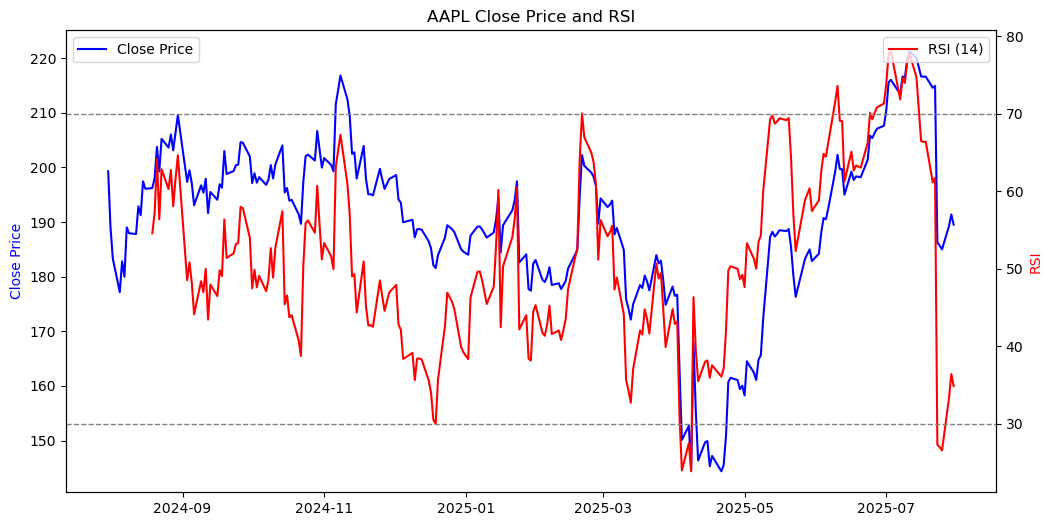

In [28]:
plt_rsi('TXN')